In [184]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv', encoding='cp1254')

In [185]:
df.head(5)  

,Kişi ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Seviyesi,Stres Seviyesi,Vücut Kitle İndeksi Kategorisi,Kan Basıncı,Kalp Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
0,1,Erkek,27,Software Engineer,6.1,6,42,6,Fazla Kilolu,126/83,77,4200,NaN
1,2,Erkek,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Erkek,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Erkek,28,Sales Representative,5.9,4,30,8,Obez,140/90,85,3000,Uyku Apnesi
4,5,Erkek,28,Sales Representative,5.9,4,30,8,Obez,140/90,85,3000,Uyku Apnesi


In [186]:
df.shape #(satır,sütun)


(374, 13)

In [188]:
df.dtypes # Veri çerçevesindeki her sütunun veri tiplerini gösterir

,0
Kişi ID,int64
Cinsiyet,object
Yaş,int64
Meslek,object
Uyku Süresi,float64
Uyku Kalitesi,int64
Fiziksel Aktivite Seviyesi,int64
Stres Seviyesi,int64
Vücut Kitle İndeksi Kategorisi,object
Kan Basıncı,object


In [189]:
df.describe() # Temel İstatistik değerleri getirir


,Kişi ID,Yaş,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Seviyesi,Stres Seviyesi,Kalp Hızı,Günlük Adım Sayısı
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [190]:
columns = [column for column in df.columns if column!='Kişi ID']   # Veri çerçevesindeki 'Kişi ID' sütunu hariç tüm sütun adlarını bir listeye alır.

In [191]:
for column in columns: # Her bir sütun için döngü başlatır.
    unique_values = df[column].unique()  # Her bir sütunun benzersiz değerlerini alır
    print(f"Unique values in '{column}': {unique_values}")  # Her bir sütunun benzersiz değerlerini ekrana yazdırır

Unique values in 'Cinsiyet': ['Erkek' 'Kadın']
Unique values in 'Yaş': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Meslek': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Uyku Süresi': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Uyku Kalitesi': [6 4 7 5 8 9]
Unique values in 'Fiziksel Aktivite Seviyesi': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stres Seviyesi': [6 8 7 4 3 5]
Unique values in 'Vücut Kitle İndeksi Kategorisi': ['Fazla Kilolu' 'Normal' 'Obez' 'Ideal Kilo']
Unique values in 'Kan Basıncı': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/9

In [192]:
# 'Uyku Bozukluğu' sütunundaki NaN değerlerini 'Bozukluk Yok' ile değiştir
df['Uyku Bozukluğu'].fillna('Bozukluk Yok', inplace=True)


In [193]:
# 'Uyku Bozukluğu' sütununun değer sayıları
uyku_bozuklugu_sayilari = df['Uyku Bozukluğu'].value_counts()

print("'Uyku Bozukluğu' Değer Sayıları:")
print(uyku_bozuklugu_sayilari)  #Insomnia ( Uykusuzluk ) - Sleep Apnea ( Uyku Apnesi ) - No Disorder ( Uyku Sorunu Yok )


'Uyku Bozukluğu' Değer Sayıları:
Uyku Bozukluğu
Bozukluk Yok    219
Uyku Apnesi      78
Uykusuzluk       77
Name: count, dtype: int64


In [194]:
# 'Vücut Kitle İndeksi Kategorisi' sütunundaki 'Normal' değerini 'Normal Kilo' ile değiştir
df['Vücut Kitle İndeksi Kategorisi'] = df['Vücut Kitle İndeksi Kategorisi'].replace({'Normal': 'Normal Kilo'})

# 'Vücut Kitle İndeksi Kategorisi' değerlerinin sayısını yazdır
df['Vücut Kitle İndeksi Kategorisi'].value_counts()

,count
Vücut Kitle İndeksi Kategorisi,
Normal Kilo,195
Fazla Kilolu,148
Ideal Kilo,21
Obez,10


In [195]:
# 'Vücut Kitle İndeksi Kategorisi' ve 'Uyku Bozukluğu' sütunlarına göre sütun grafiği oluştur
fig = px.histogram(data_frame=df, x='Vücut Kitle İndeksi Kategorisi', color='Uyku Bozukluğu', title='Vücut Kitle İndeksi (BMI) Kategorilerinin Sayıları için Sütun Grafiği')

# Grafiği göster
fig.show()


In [196]:
# "Uyku Kalitesi" sütununa göre histogram oluşturuluyor, "Uyku Bozukluğu" renk olarak kullanılıyor
fig = px.histogram(data_frame=df, x='Uyku Kalitesi', color='Uyku Bozukluğu',
                   title='Vücut Kitle İndeksi Kategorileri Sayıları Sütun Grafiği') # Sütun grafiği başlığını belirler

fig.show()  # Grafiği ekranda görüntüler

In [197]:
# "Meslek" sütununa göre histogram oluşturuluyor, "Uyku Bozukluğu" renk olarak kullanılıyor
fig = px.histogram(data_frame=df, x='Meslek', color='Uyku Bozukluğu',
                   title='Vücut Kitle İndeksi Kategorileri Sayıları Sütun Grafiği')

fig.show()

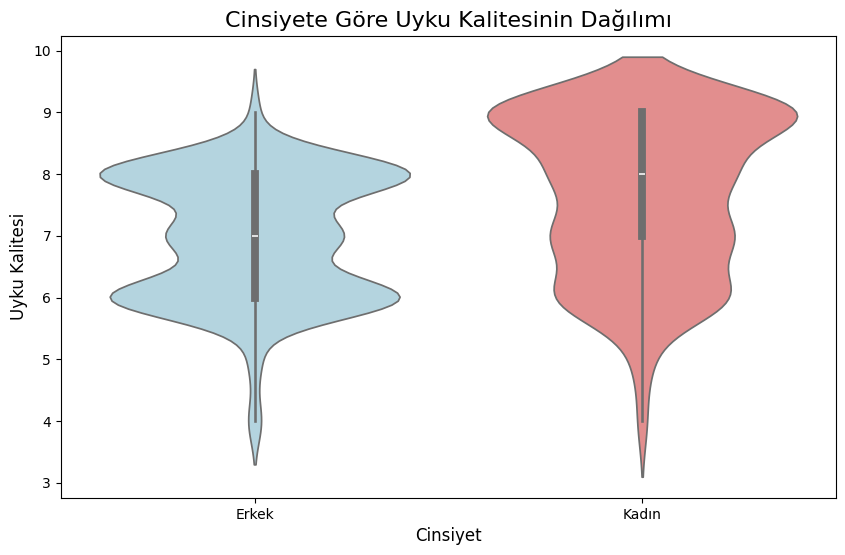

In [200]:
color_palette = {'Erkek': 'lightblue', 'Kadın': 'lightcoral'}  # Her cinsiyet için renk paletini tanımlar
plt.figure(figsize=(10, 6))   # Grafiğin boyutunu belirler
sns.violinplot(x='Cinsiyet', y='Uyku Kalitesi', data=df, palette=color_palette)   # 'Cinsiyet' kategorisi için belirlenen renk paleti kullanılır
plt.title('Cinsiyete Göre Uyku Kalitesinin Dağılımı', fontsize=16)  # Grafiğe başlık ekler ve başlık font boyutunu 16 olarak ayarlar
plt.xlabel('Cinsiyet', fontsize=12)  # X eksenine etiket ekler ve etiket font boyutunu 12 olarak ayarlar
plt.ylabel('Uyku Kalitesi', fontsize=12) # Y eksenine etiket ekler ve etiket font boyutunu 12 olarak ayarlar
plt.show() # Grafiği ekranda görüntüler


In [201]:
fig = px.bar(df,   # Veri çerçevesini belirtir
             x='Stres Seviyesi',  
             y='Uyku Kalitesi', 
             color='Stres Seviyesi',
             title='Stres Seviyesi ve Uyku Kalitesi Arasındaki İlişki'
            )  # Bar grafiği oluşturur
fig.show()  # Grafiği ekranda görüntüler


In [202]:
df = pd.concat([df, df['Kan Basıncı'].str.split('/', expand=True)], axis=1).drop('Kan Basıncı', axis=1) # 'Kan Basıncı' sütununu ikiye böler ve yeni sütunlar oluşturur 
df = df.rename(columns={0: 'Sistolik', 1: 'Diastolik'})  # Yeni sütunlara uygun isimler verir


In [203]:
df['Sistolik'] = df['Sistolik'].astype(float)  # 'Sistolik' sütununu ondalıklı sayıya dönüştürür
df['Diastolik'] = df['Diastolik'].astype(float)  # 'Diastolik' sütununu ondalıklı sayıya dönüştürür


In [204]:
sayisal_ozellikler = ['Yaş', 'Uyku Süresi',  
                      'Fiziksel Aktivite Seviyesi',
                      'Kalp Hızı', 'Günlük Adım Sayısı', 'Sistolik', 'Diastolik']  # Sayısal özelliklerin adlarını içeren bir liste oluşturur


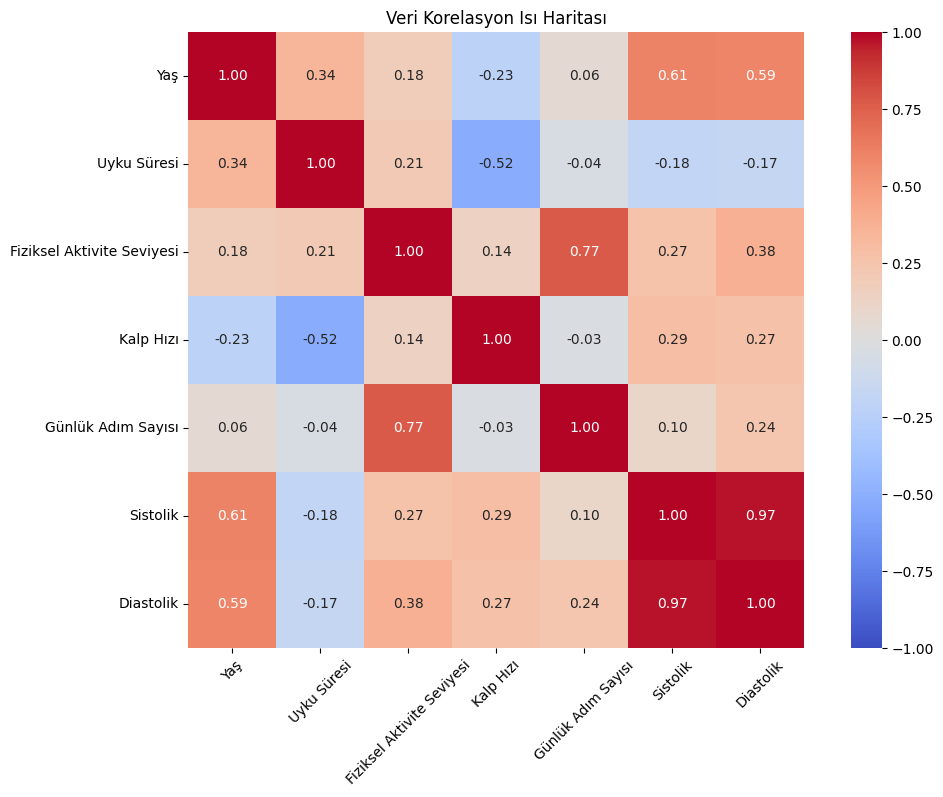

In [205]:
# Korelasyon matrisini hesapla
korelasyon_matrisi = df[sayisal_ozellikler].corr()

# Matplotlib figürünü ayarla
plt.figure(figsize=(12, 8))

# Heatmap'i maskesiz çiz
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)

# Grafik etiketlerini ve başlığını özelleştir
plt.title('Veri Korelasyon Isı Haritası')  # Başlık
plt.xticks(rotation=45)   # X eksenindeki etiketleri 45 derece döndür
plt.yticks(rotation=0)    # Y eksenindeki etiketleri döndürme

# Grafiği göster
plt.show()


In [206]:
df.drop(columns=['Kişi ID'],inplace = True)   # 'Kişi ID    sütununu veri çerçevesinden çıkarır 


In [207]:
label_encoder = LabelEncoder() # LabelEncoder sınıfından bir nesne oluşturur
df['Uyku Bozukluğu'] = label_encoder.fit_transform(df['Uyku Bozukluğu'])  # 'Uyku Bozukluğu' sütununu sayısal değerlere dönüştürür

In [162]:
print(label_encoder.classes_)  # LabelEncoder sınıfının sınıf etiketlerini yazdırır
 

['Bozukluk Yok' 'Uyku Apnesi' 'Uykusuzluk']


 **ÖN İŞLEME**

In [208]:
sayisal_ozellikler = ['Yaş', 'Uyku Süresi',
                       'Kalp Hızı', 'Günlük Adım Sayısı', 'Sistolik', 'Diastolik']  # Sayısal özelliklerin adlarını içeren bir liste oluşturur

kategorik_ozellikler = ['Meslek', 'Uyku Kalitesi', 'Cinsiyet',
                        'Fiziksel Aktivite Seviyesi', 'Stres Seviyesi', 'Vücut Kitle İndeksi Kategorisi']  # Kategorik özelliklerin adlarını içeren bir liste oluşturur


In [209]:
ön_işleme = ColumnTransformer( # ColumnTransformer sınıfından bir nesne oluşturur
    transformers=[   # Dönüşüm işlemlerini belirtir
        ('sayisal', RobustScaler(), sayisal_ozellikler),  # Sayısal özellikler için RobustScaler dönüşümünü uygular
        ('kategorik', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), kategorik_ozellikler)  # Kategorik özellikler için OneHotEncoder dönüşümünü uygular
    ])


In [210]:
X = df.drop(columns=['Uyku Bozukluğu'])  # 'Uyku Bozukluğu' sütununu veri çerçevesinden çıkarır ve geriye kalan sütunları X değişkenine atar
y = df['Uyku Bozukluğu'] # 'Uyku Bozukluğu' sütununu y değişkenine atar


In [211]:
X_islenmis = ön_işleme.fit_transform(X) # Verileri ön işleme nesnesiyle dönüştürür


**Dengesizlik Verilerinin İşlenmesi**

In [212]:
# SMOTE'yi başlat
smote = SMOTE(random_state=42)  

# SMOTE oversampling (aşırı örnekleme) işlemi yap
X_smote, y_smote = smote.fit_resample(X_islenmis, y)   # X ve y verilerini aşırı örnekleme işlemine tabi tutar
X_smote.shape  # Aşırı örnekleme sonucu oluşan X verisinin boyutunu yazdırır


(657, 45)

In [213]:
# Veriyi eğitim ve test setlerine ayırma (örneğin, %75 eğitim, %25 test)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)


**Model Eğitme** - LOGİSTİC REGRESYON-


Doğruluk: 0.9151515151515152
Kesinlik: 0.918337101915166
Geri Bulma: 0.9151515151515152
F1-Skoru: 0.9150469370989746
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        64
           1       0.94      0.88      0.91        50
           2       0.96      0.88      0.92        51

    accuracy                           0.92       165
   macro avg       0.92      0.91      0.91       165
weighted avg       0.92      0.92      0.92       165

Konfüzyon Matrisi:
[[62  0  2]
 [ 6 44  0]
 [ 3  3 45]]


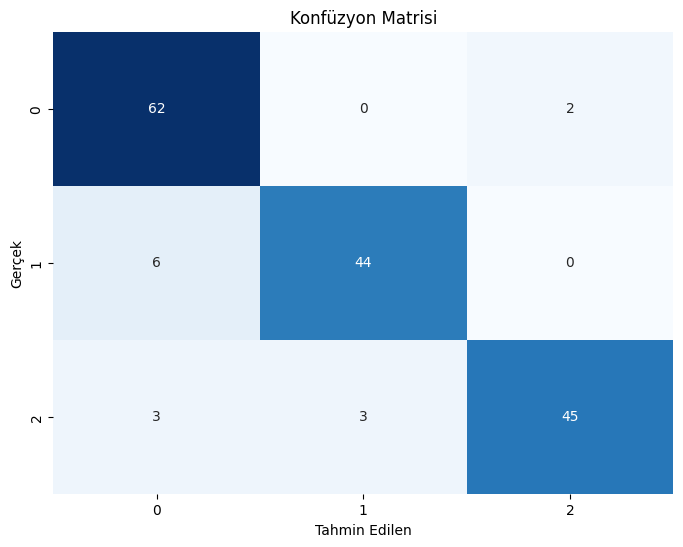

In [214]:
# Lojistik Regresyon sınıflandırıcıyı başlatma
model_lr = LogisticRegression()

# Modeli eğitim verisi üzerinde eğitme
model_lr.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_lr = model_lr.predict(X_test)

# Değerlendirme metriklerini hesaplama
doğruluk_lr = accuracy_score(y_test, y_pred_lr)  # Doğruluk metriğini hesaplar
kesinlik_lr = precision_score(y_test, y_pred_lr, average='weighted')  # Kesinlik metriğini hesaplar 
geri_bulma_lr = recall_score(y_test, y_pred_lr, average='weighted')   # Geri Bulma metriğini hesaplar
f1_skoru_lr = f1_score(y_test, y_pred_lr, average='weighted')      # F1-Skoru metriğini hesaplar

# Metrikleri yazdırma
print(f'Doğruluk: {doğruluk_lr}')  
print(f'Kesinlik: {kesinlik_lr}')  
print(f'Geri Bulma: {geri_bulma_lr}')
print(f'F1-Skoru: {f1_skoru_lr}')  

# Sınıflandırma raporunu oluşturma
print(classification_report(y_test, y_pred_lr))

# Konfüzyon matrisini oluşturma
cm_lr = confusion_matrix(y_test, y_pred_lr)  # Konfüzyon matrisini hesaplar
print('Konfüzyon Matrisi:')   # Konfüzyon matrisini yazdırır
print(cm_lr)  # Konfüzyon matrisini yazdırır

# Konfüzyon matrisini seaborn kullanarak görselleştirme
plt.figure(figsize=(8, 6))   # Grafiğin boyutunu belirler
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)   # Konfüzyon matrisini ısı haritası olarak çizer
plt.xlabel('Tahmin Edilen')  # X eksenine etiket ekler
plt.ylabel('Gerçek')      # Y eksenine etiket ekler
plt.title('Konfüzyon Matrisi')  # Grafiğe başlık ekler
plt.show()  # Grafiği ekranda görüntüler


**XGB Classifier**


Doğruluk (Accuracy): 0.9151515151515152
Kesinlik (Precision): 0.918337101915166
Hatırlama (Recall): 0.9151515151515152
F1 Skoru: 0.9150469370989746
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        64
           1       0.94      0.88      0.91        50
           2       0.96      0.88      0.92        51

    accuracy                           0.92       165
   macro avg       0.92      0.91      0.91       165
weighted avg       0.92      0.92      0.92       165

Karışıklık Matrisi:
[[62  0  2]
 [ 6 44  0]
 [ 3  3 45]]


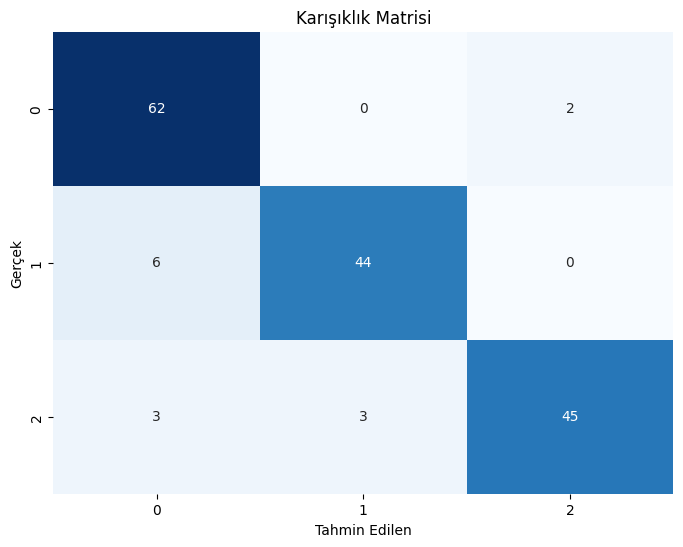

In [215]:
# XGBoost sınıflandırıcı modelini başlat
model_xgb = xgb.XGBClassifier()

# Modeli eğitim verisiyle eğit
model_xgb.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = model_xgb.predict(X_test)

# Modelin değerlendirme metriklerini hesapla
accuracy_xgb = accuracy_score(y_test, y_pred)  # Doğruluk
precision_xgb = precision_score(y_test, y_pred, average='weighted')  # Kesinlik
recall_xgb = recall_score(y_test, y_pred, average='weighted')  # Hatırlama (Recall)
f1_xgb = f1_score(y_test, y_pred, average='weighted')  # F1 Skoru

# Metrikleri yazdır
print(f'Doğruluk (Accuracy): {accuracy_xgb}')
print(f'Kesinlik (Precision): {precision_xgb}')
print(f'Hatırlama (Recall): {recall_xgb}')
print(f'F1 Skoru: {f1_xgb}')

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, y_pred))

# Karışıklık matrisi (Confusion Matrix) oluştur
cm = confusion_matrix(y_test, y_pred)
print('Karışıklık Matrisi:')
print(cm)

# Karışıklık matrisini görselleştir (Seaborn ile ısı haritası)
plt.figure(figsize=(8, 6))  # Grafiğin boyutunu belirler
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Karışıklık matrisini ısı haritası olarak çizer
plt.xlabel('Tahmin Edilen')  # X eksenine etiket ekler
plt.ylabel('Gerçek')         # Y eksenine etiket ekler
plt.title('Karışıklık Matrisi') # Grafiğe başlık ekler
plt.show()


In [224]:

# K-Fold uygulandığında

from sklearn.compose import ColumnTransformer   # ColumnTransformer sınıfını içeri aktarır
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # OneHotEncoder ve StandardScaler sınıflarını içeri aktarır
from sklearn.linear_model import LogisticRegression    # Lojistik Regresyon sınıfını içeri aktarır
from sklearn.model_selection import cross_val_score    # cross_val_score fonksiyonunu içeri aktarır
import pandas as pd   # pandas kütüphanesini içeri aktarır

# Örnek olarak X ve y'nin nasıl ayrıldığını gösteriyoruz
 #X: Özellikler, y: Hedef değişken
 #X = df.drop(columns=['Hedef_Sütun'])
 #y = df['Hedef_Sütun']

# Kategorik ve sayısal sütunları belirleyin
categorical_features = ['Meslek', 'Uyku Kalitesi', 'Cinsiyet',
                        'Fiziksel Aktivite Seviyesi', 'Stres Seviyesi', 'Vücut Kitle İndeksi Kategorisi']  # Örnek kategorik sütunlar
numeric_features = ['Yaş', 'Uyku Süresi',
                       'Kalp Hızı', 'Günlük Adım Sayısı', 'Sistolik', 'Diastolik'] # Örnek sayısal sütunlar

# Preprocessor (ön işleyici) tanımlayın
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Sayısal veriler için standardizasyon
        ('cat', OneHotEncoder(), categorical_features)  # Kategorik veriler için one-hot encoding
    ]
)

# X'i dönüştürün
X_preprocessed = preprocessor.fit_transform(X)

# Logistic Regression modeli
model_lr = LogisticRegression()

# Cross-validation kullanarak modelin değerlendirilmesi
scores = cross_val_score(model_lr, X_preprocessed, y, cv=5)  # 5-Fold Cross Validation
print("Logistic Regression CV Accuracy:", scores.mean())



Logistic Regression CV Accuracy: 0.8101981981981983


**K Neighbors Classifier**


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.92      0.90      0.91        50
           2       0.88      0.88      0.88        51

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



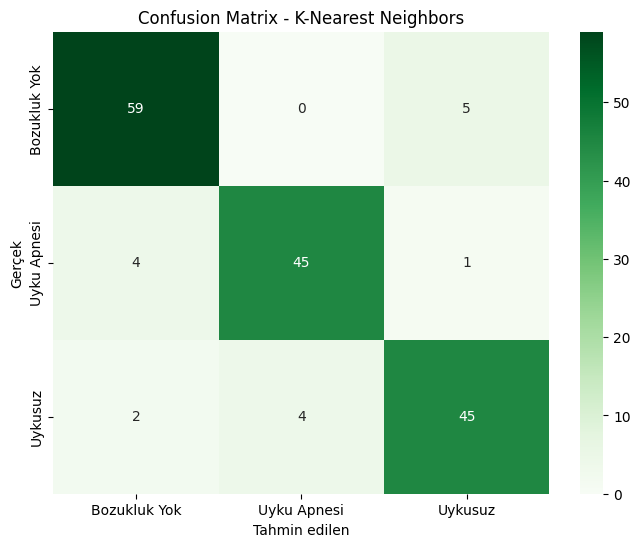

Accuracy: 0.9030
Precision: 0.9031
Recall: 0.9030
F1 Score: 0.9030


In [216]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier (example using k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train)

# Predictions
y_pred = knn_clf.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred) # Accuracy    
precision_knn = precision_score(y_test, y_pred, average='weighted')  # Precision
recall_knn = recall_score(y_test, y_pred, average='weighted')   # Recall
f1_knn = f1_score(y_test, y_pred, average='weighted') # F1 Score

# Classification report
print("Classification Report:")  # Classification report başlığını yazdırır
print(classification_report(y_test, y_pred))  # Classification report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))   # Grafiğin boyutunu belirler
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=['Bozukluk Yok', 'Uyku Apnesi', 'Uykusuz'], yticklabels=['Bozukluk Yok', 'Uyku Apnesi', 'Uykusuz'])
plt.xlabel('Tahmin edilen')  # X eksenine etiket ekler
plt.ylabel('Gerçek')         # Y eksenine etiket ekler
plt.title('Confusion Matrix - K-Nearest Neighbors')  # Grafiğe başlık ekler
plt.show()  

# Display metrics
print(f"Accuracy: {accuracy_knn:.4f}")  # Accuracy metriğini yazdırır
print(f"Precision: {precision_knn:.4f}")  # Precision metriğini yazdırır
print(f"Recall: {recall_knn:.4f}")   # Recall metriğini yazdırır
print(f"F1 Score: {f1_knn:.4f}")  # F1 Score metriğini yazdırır


In [220]:
#K-Fold Uygulandığında 
from sklearn.compose import ColumnTransformer   # ColumnTransformer sınıfını içeri aktarır
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # OneHotEncoder ve StandardScaler sınıflarını içeri aktarır
from sklearn.model_selection import cross_val_score   # cross_val_score fonksiyonunu içeri aktarır
from sklearn.neighbors import KNeighborsClassifier   # KNeighborsClassifier sınıfını içeri aktarır
import xgboost as xgb   # xgboost kütüphanesini içeri aktarır
import pandas as pd     # pandas kütüphanesini içeri aktarır

# Örnek olarak X ve y'nin nasıl ayrıldığını gösteriyoruz
# X = df.drop(columns=['Hedef_Sütun'])  # Özellikler
# y = df['Hedef_Sütun']  # Hedef değişken

# Kategorik ve sayısal sütunları belirleyin
categorical_features = ['Meslek', 'Uyku Kalitesi', 'Cinsiyet',
                        'Fiziksel Aktivite Seviyesi', 'Stres Seviyesi', 'Vücut Kitle İndeksi Kategorisi']  # Örnek kategorik sütunlar
numeric_features = ['Yaş', 'Uyku Süresi',
                       'Kalp Hızı', 'Günlük Adım Sayısı', 'Sistolik', 'Diastolik'] # Örnek sayısal sütunlar


# Preprocessor (ön işleyici) tanımlayın
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Sayısal veriler için standardizasyon
        ('cat', OneHotEncoder(), categorical_features)  # Kategorik veriler için one-hot encoding
    ]
)

# X'i dönüştürün
X_preprocessed = preprocessor.fit_transform(X)

# 1. **KNN Modeli ile K-Fold Cross-Validation**
knn_model = KNeighborsClassifier(n_neighbors=5)  # KNN modelini tanımlayın
knn_scores = cross_val_score(knn_model, X_preprocessed, y, cv=5)  # 5-Fold Cross Validation
print("KNN Modeli CV Doğruluğu:", knn_scores.mean())




KNN Modeli CV Doğruluğu: 0.8129009009009008


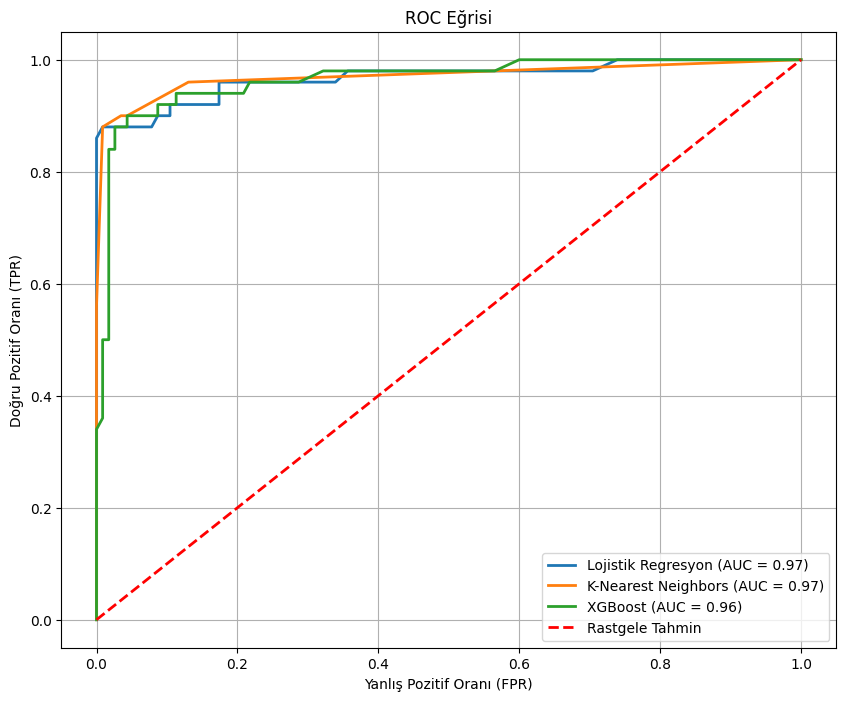

In [217]:
from sklearn.metrics import roc_curve, auc

# Grafik için figür oluşturma
fig_roc = plt.figure(figsize=(10, 8))
modeller = ['Lojistik Regresyon', 'K-Nearest Neighbors', 'XGBoost']

# Her model için ROC eğrisini çizme
for idx, model in enumerate([model_lr, knn_clf, model_xgb]):
    # KNN için 'predict_proba' kullanımı
    if model == knn_clf:
        y_scores = model.predict_proba(X_test)  # Tahmin olasılıklarını alır
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)   # ROC eğrisini hesaplar
    else:
        # Diğer modeller için 'predict_proba' kullanımı
        y_scores = model.predict_proba(X_test)[:, 1]   # Tahmin olasılıklarını alır
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)  # ROC eğrisini hesaplar

    # AUC hesaplama
    roc_auc = auc(fpr, tpr)  

    # ROC eğrisini çizme
    plt.plot(fpr, tpr, lw=2, label=f'{modeller[idx]} (AUC = {roc_auc:.2f})')

# Rastgele tahmin için ROC eğrisini çizme
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Rastgele Tahmin')

# Grafik etiketlerini ve başlığını ayarlama
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid()

# Grafiği gösterme
plt.show()
